In [2]:
def is_prime(n):
    if(n<=1):
        return False
    if(n==2):
        return False
    if (n%2) ==0:
        return False
    for i in range(3,int(n**0.5)+1,2):
        if n%i ==0:
            return False
    
    return True



In [3]:

import pandas as pd

data={"Number": list(range(1,10001))}
df=pd.DataFrame(data)
df["Is_Prime"]=df["Number"].apply(is_prime)
df. to_csv('prime_dataset.csv',index=False)



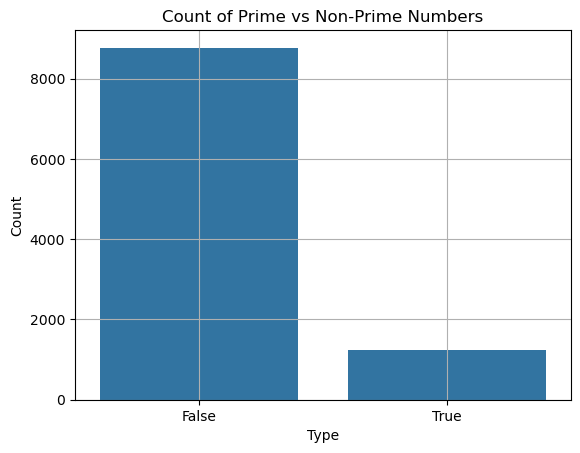

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Is_Prime',data=df)
plt.title("Count of Prime vs Non-Prime Numbers")

plt.xlabel('Type')
plt.ylabel('Count')

plt.grid(True)
plt.show()

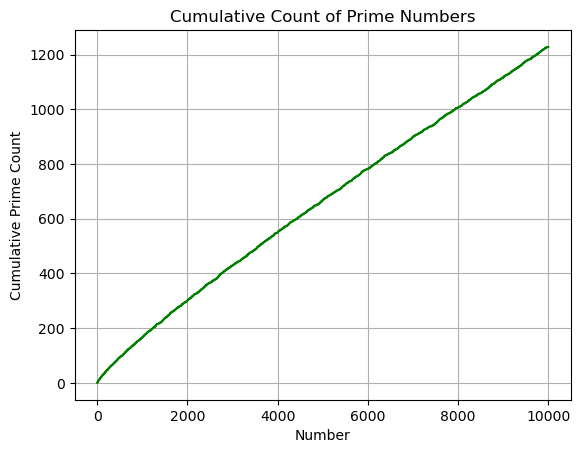

In [5]:
# Show how the count of Prime Number increases as Numbers go from 1 to 10000

df['Cum_Primes']=df['Is_Prime'].cumsum()

plt.plot(df['Number'],df['Cum_Primes'],color='green')
plt.title('Cumulative Count of Prime Numbers')
plt.xlabel('Number')
plt.ylabel('Cumulative Prime Count')
plt.grid(True)
plt.show()

In [6]:
prime_count=(df['Is_Prime']).sum()
print('Total Prime Numbers:', prime_count)

Total Prime Numbers: 1228


In [7]:
Non_prime_count=(~df['Is_Prime']).sum()
print('Total Prime Numbers:', Non_prime_count)

Total Prime Numbers: 8772


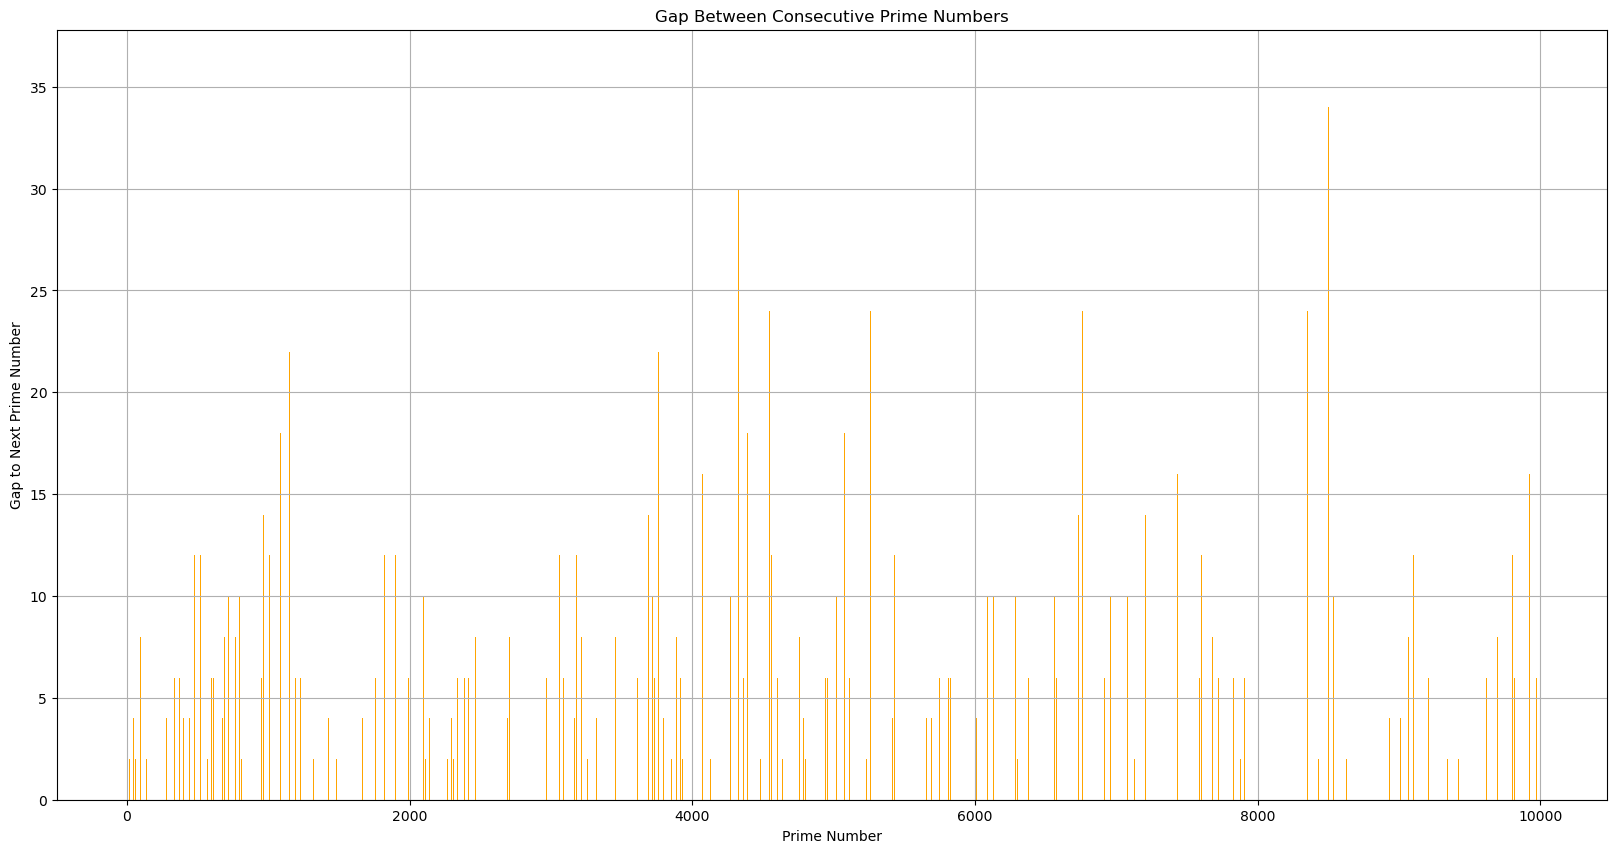

In [8]:
# Calculate the difference between each prime and the next one

prime_numbers=df[df['Is_Prime']==True]['Number'].reset_index(drop=True)
prime_gaps=prime_numbers.diff().dropna()

plt.figure(figsize=(20,10))
plt.bar(prime_numbers[1:],prime_gaps,color='orange')
plt.title('Gap Between Consecutive Prime Numbers')
plt.xlabel('Prime Number')
plt.ylabel('Gap to Next Prime Number')
plt.grid(True)
plt.show()


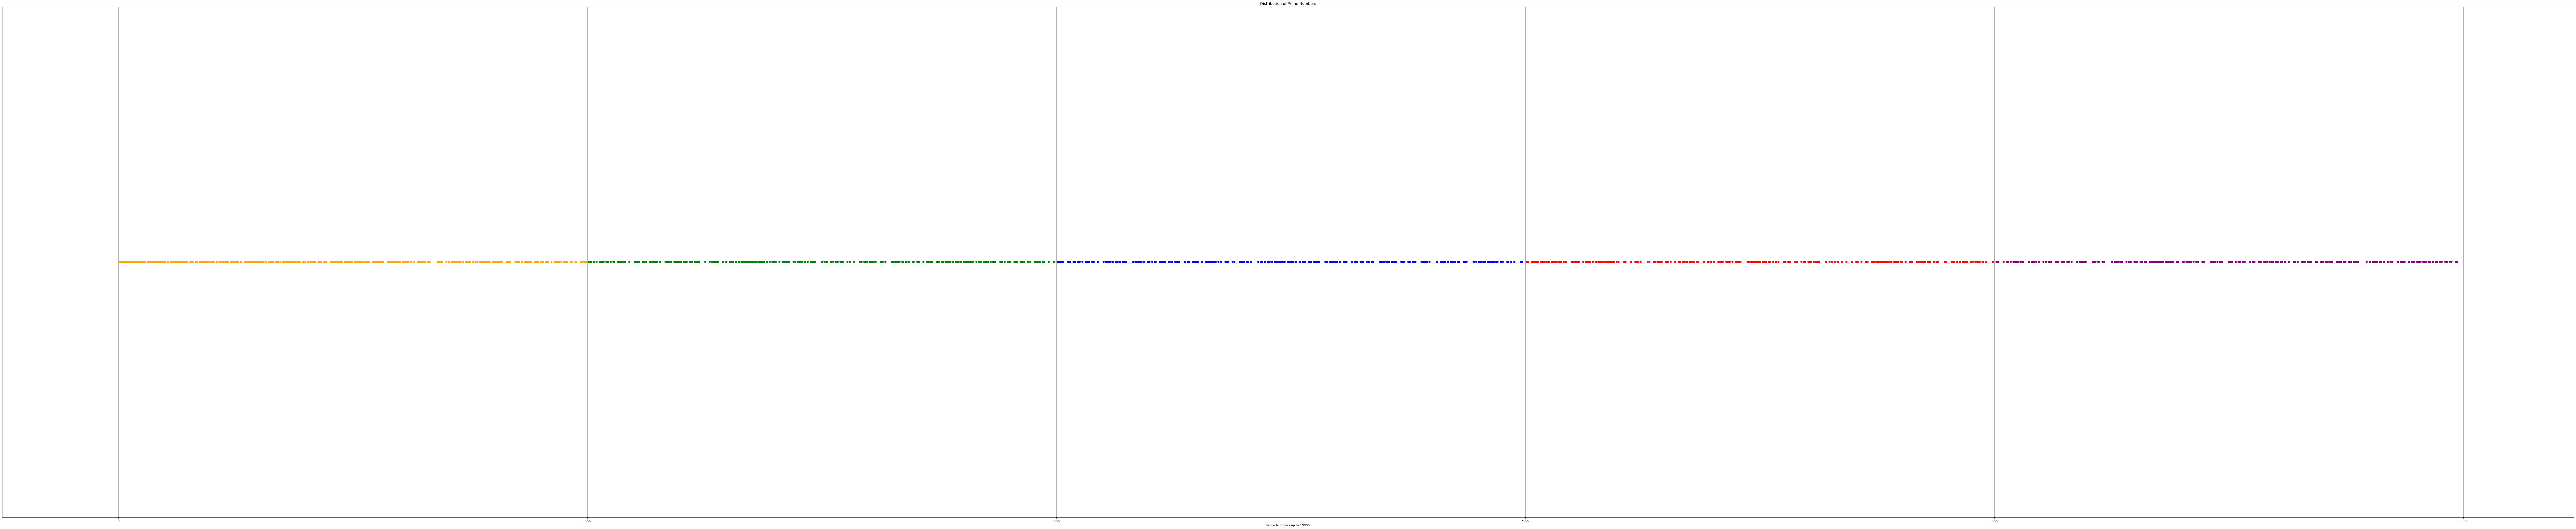

In [9]:
# Distribution of Prime Numbers
# Plot Primes as dots to visualize their spread
prime_nums=df[df['Is_Prime']==True]
colors=[]
for num in prime_nums['Number']:
    if num <= 2000:
        colors.append('orange')
    elif num<=4000:
        colors.append('green')
    elif num<=6000:
        colors.append('blue')
    elif num<=8000:
        colors.append('red')
    else:
        colors.append('purple')
        

plt.figure(figsize=(150,30))
plt.scatter(prime_nums['Number'],[1]*len(prime_nums),alpha=1,c=colors)
plt.title('Distribution of Prime Numbers')
plt.yticks([])
plt.xlabel('Prime Numbers up to 10000')
plt.grid(True)
plt.show()

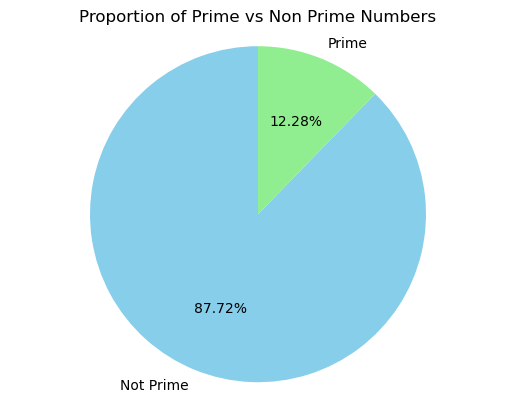

In [10]:
#Pie Chart-Proportion of Primes vs Non - Primes
# logic: Show percentage of Primes and Non-Primes

counts=df['Is_Prime'].value_counts()
labels=['Not Prime', 'Prime']
plt.pie(counts,labels=labels,autopct='%1.2f%%', startangle=90,colors=['skyblue','lightgreen'])
plt.title('Proportion of Prime vs Non Prime Numbers')
plt.axis('equal')
plt.show()

In [11]:
#Building a simple Classifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

#example feature engineering
df['mod_2']=df['Number']%2
df['mod_3']=df['Number']%3
df['digit_sum']=df['Number'].apply(lambda x:sum(int(d) for d in str(x)))
df['is_square']=df['Number'].apply(lambda x: 1 if int(x**0.5)**2==x else 0)
df['mod_6_is_1_or_5']=df['Number'].apply(lambda x: 1 if x>3 and (x % 6==1 or x%6 ==5) else 0)

X=df[['Number','mod_2','mod_3','digit_sum','is_square','mod_6_is_1_or_5']]
y=df['Is_Prime']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model=RandomForestClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test,y_pred))

#Gradient Boosting Model
model= GradientBoostingClassifier()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
print('Gradient Boosting Accuracy:',accuracy_score(y_test,y_pred))

Accuracy: 0.8245
Gradient Boosting Accuracy: 0.8645


In [16]:
def extract_features(number):
    return pd.DataFrame([{
        'Number': number,
        'mod_2': number % 2,
        'mod_3': number % 3,
        'digit_sum': sum(int(d) for d in str(number)),
        'is_square': 1 if int(number**0.5)**2 == number else 0,
        'mod_6_is_1_or_5': 1 if number > 3 and (number % 6 == 1 or number % 6 == 5) else 0
    }])

user_input = int(input("Enter a number: "))
input_features = extract_features(user_input)

prediction = model.predict(input_features)[0]
print(f"The number {user_input} is", "Prime" if prediction == 1 else "Not Prime")

Enter a number:  565491


The number 565491 is Not Prime
